<a href="https://colab.research.google.com/github/kashafnaveed123/Denoising_Autoencoders/blob/main/DenoisingAutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Denoising Autoencoder**

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from tensorflow import keras

In [4]:
import numpy as np

In [8]:
(x_train,_),(x_test,_)=keras.datasets.mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


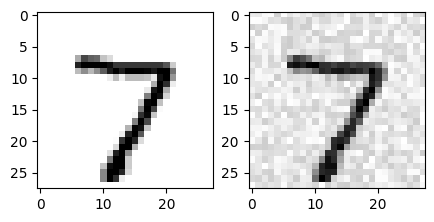

In [30]:
  # plot the original image from the set
  subplot(1,2,1)
  # display the original image from the test set
  imshow(x_test[0],cmap="binary")

  # plot the noisy version image
  subplot(1,2,2)
  # generate random noise and add it to the original image of test set
  noise=np.random.random((28,28))/4
  imshow(x_test[0]+noise,cmap="binary")

In [31]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
encoder.predict(x_test[0].reshape((1,28,28))).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


(1, 64)

In [13]:
decoder = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape((28, 28))
])

In [14]:
stacked_autoencoder=keras.models.Sequential([encoder,decoder])

In [15]:
stacked_autoencoder.compile(
    loss="binary_crossentropy",
    optimizer='adam'
)

In [17]:
# adding random noise to training dataset and testing dataset
x_train_noise=x_train + ((np.random.random(x_train.shape))/4)
x_test_noise=x_test + ((np.random.random(x_test.shape))/4)

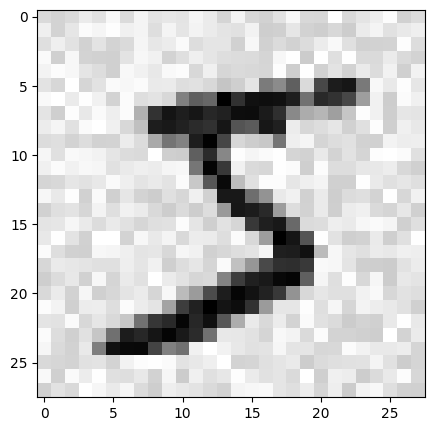

In [18]:
# to see an example from noiy data
imshow(x_train_noise[0],cmap="binary")

In [19]:
history=stacked_autoencoder.fit(
    x_train_noise,x_train,epochs=10,validation_data=[x_test_noise,x_test]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.1803 - val_loss: 0.1029
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 0.1012 - val_loss: 0.0931
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0927 - val_loss: 0.0884
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0889 - val_loss: 0.0861
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 0.0863 - val_loss: 0.0844
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 0.0843 - val_loss: 0.0831
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0829 - val_loss: 0.0818
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0816 - val_loss: 0.0811
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0806 - val_loss: 0.0803
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.0800 - val_loss: 0.0795


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


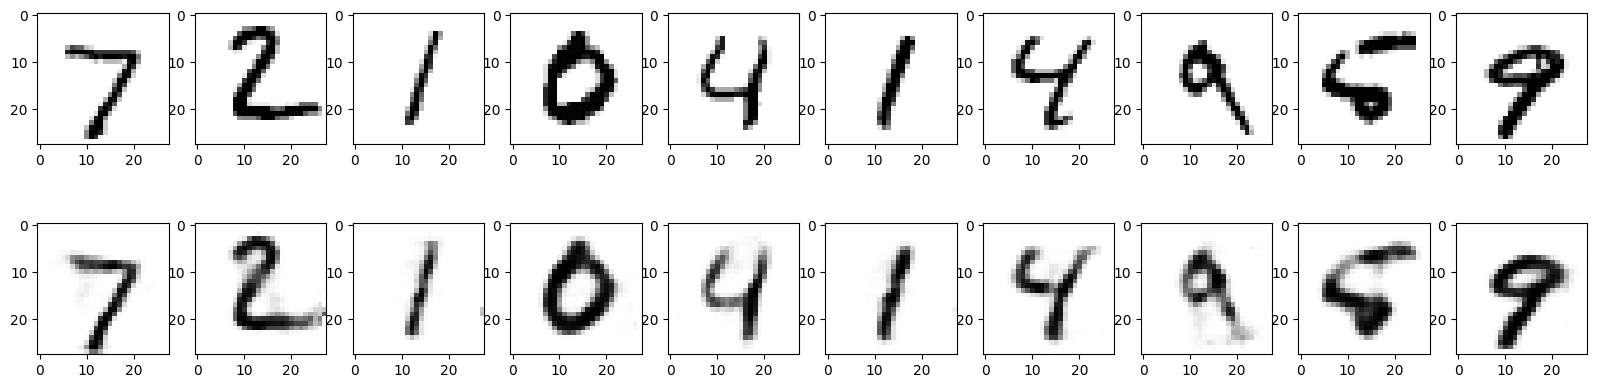

In [23]:
figsize(20,5)
# iterate over 10 examples of test set
for i in range(10):
  # plot the original image from the set
  subplot(2,10,i+1)
  # make a prediction of the current image using stacked autoencoder
  pred=stacked_autoencoder.predict(x_test[i].reshape((1,28,28)))
  # display the original image
  imshow(x_test[i],cmap="binary")

  # plot the reconstructed image
  subplot(2,10,i+10+1)
  # display the reconstructed image
  imshow(pred.reshape((28,28)),cmap="binary")